# DSCI 100 Group 42 Proposal 

### Introduction:
Can we predict the win rate of a player given their various statistics?
We aim to investigate the factors that influence the win rate in tennis games. Can we predict the win rate of a player given their various statistics? We are interested in understanding the relationship between a player's stats and the likelihood of winning a game. By gaining insights into how these factors relate to the probability of winning, we can make more informed and predictive decisions regarding future tennis matches.

To conduct our research, we chose to use the `atp2017-2019.csv` dataset provided on the group project proposal page on Canvas. This dataset contains 6866 observations and 49 variables. Each observation represents a match played in 2017-2019 between top 500 ATP ranked players. The variables contain information both about the match and the individual player stats, with 11 being unique variables, and the rest being various player stats that are separate for the winner and the loser.

### Preliminary exploratory data analysis:

The following libraries are loaded to provide the functions that operate on the data:

In [21]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 10)

The data is shown below. It is read using `read_csv` and already appears tidy.

In [34]:
tennis_data <- read_csv("atp2017-2019.csv") |>
    select(-...1) |>
    mutate(surface = as_factor(surface))
tennis_data

New names:
• `` -> `...1`
Rows: 6866 Columns: 50
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (16): tourney_id, tourney_name, surface, tourney_level, winner_seed, win...
dbl (34): ...1, draw_size, tourney_date, match_num, winner_id, winner_ht, wi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,⋯,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
<chr>,<chr>,<fct>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,NA,⋯,54,34,20,14,10,15,9,3590,16,1977
2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,NA,⋯,52,36,7,10,10,13,16,1977,239,200
2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,NA,⋯,27,15,6,8,1,5,9,3590,40,1050
2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NA,PR,⋯,60,38,9,11,4,6,239,200,31,1298
2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,NA,⋯,56,46,19,15,2,4,16,1977,18,1855
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-0605,Tour Finals,Hard,8,F,20171113,300,105777,6.0,NA,⋯,54,42,22,15,11,15,6,3650,8,2975
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,1,105676,NA,NA,⋯,53,33,21,14,6,11,7,3775,18,2235
2017-M-DC-2017-WG-M-BEL-FRA-01,Davis Cup WG F: BEL vs FRA,Hard,4,D,20171124,2,104542,NA,NA,⋯,54,30,12,12,5,11,15,2320,76,667


The seed is set for a consistent split. The means of each of the quantitative variables are found and grouped by surface as a way to explore the data.

In [35]:
set.seed(1000)

tennis_split <- initial_split(tennis_data, prop = 0.75, strata = surface)  
tennis_training <- training(tennis_split) 

tennis_training_stats <- tennis_training |>
    select(surface, minutes:l_bpFaced) |>
    filter(surface != "None") |>
    group_by(surface) |>
    summarize(count = n(), across(minutes:l_bpFaced, mean, na.rm = TRUE))

tennis_training_stats

surface,count,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,⋯,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hard,2957,108.2576,8.068765,2.819706,78.35683,48.50154,37.32809,16.52617,12.64831,⋯,4.674307,6.322956,3.529935,81.67910,49.16387,33.68799,15.07013,12.41567,4.610674,8.166952
Clay,1576,112.1838,5.064309,2.466881,78.36077,49.14212,36.24952,16.26302,12.54469,⋯,5.379421,3.863023,3.062379,81.54084,49.87974,32.36720,14.57942,12.32347,4.974277,9.072669
Grass,604,115.9334,9.953333,3.121667,88.96167,56.85667,44.34833,18.21000,14.65833,⋯,4.955000,7.660000,3.940000,92.85667,57.22500,39.95500,17.04667,14.33333,5.130000,8.723333


The visualization below observes whether or not age has a direct connection with the number of wins a player has.

`summarise()` has grouped output by 'winner_name'. You can override using the
`.groups` argument.


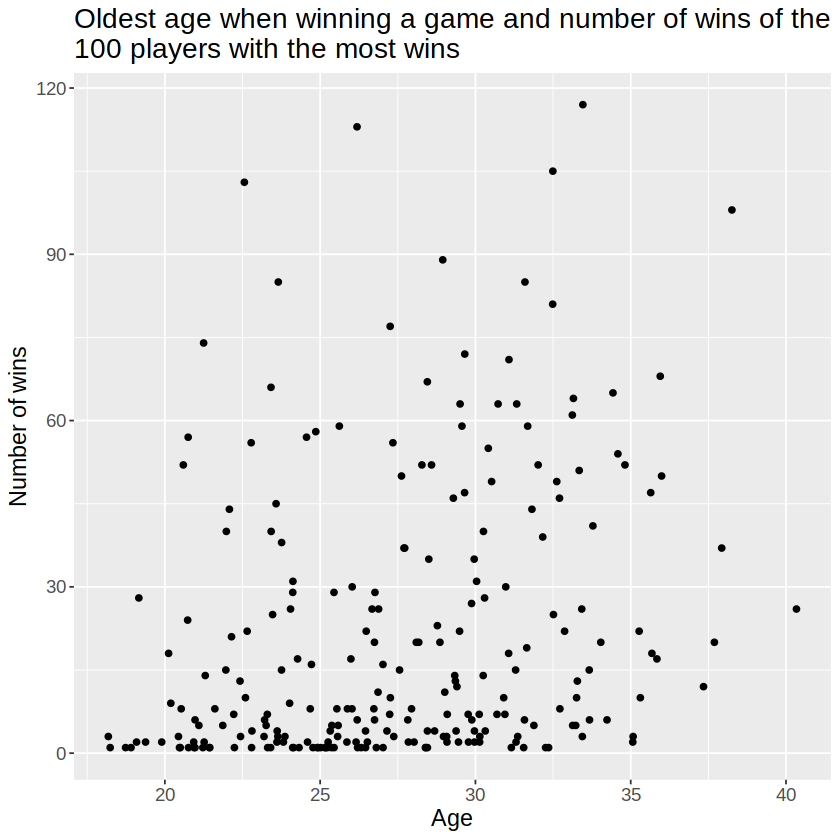

In [48]:
top_100_names <- tennis_training |>
    group_by(winner_name, winner_ht) |>
    summarize(count = n()) |> 
    slice_max(count, n = 100) |>
    pull(winner_name)

training_top_100 <- tennis_training |>
    filter(winner_name %in% top_100_names) |>
    group_by(winner_name) |>
    summarize(count = n(), winner_age = max(winner_age))

training_wins_plot <- ggplot(training_top_100, aes(x = winner_age, y = count)) +
    geom_point() +
    xlab("Age") +
    ylab("Number of wins") +
    ggtitle("Oldest age when winning a game and number of wins of the \n100 players with the most wins") +
    theme(text = element_text(size = 14))

training_wins_plot

There doesn't appear to be a clear relationship, suggesting that we will get a range of win rates as the total number of games is likely linked to age. This likely means that certain older players have stats from their game play that reflect their experience, and thus increase their win rate.

### Methods:

The data will have to be wrangled in a number of ways to identify the win rate and average statistics of each player, as the current format doesn't allow for that. We will conduct our data analysis using regression aiming to predict win rate. The various quantitative values, such as number of aces and double faults, provided in the dataset will be included as predictors.

We can visualize the results using multiple scatter plots, plotting individual stats against win rate. This would allow us to see if the two variables are related, and possibly which stats have the strongest relationship with win rate.


### Expected outcomes and significance:

Naturally, younger players often enjoy certain athletic advantages, so it's reasonable to expect that factors such as age and height could serve as predictor variables when it comes to win rate. However, conventional wisdom can sometimes lead us astray, as factors that may seem significant on the surface might not prove to be strong predictors. For instance, it's possible that a higher number of double faults may not significantly impact the game's outcome. These findings could prompt further exploration into the significance of these statistics in relation to the win rate. Analyzing data from recent years, or even from earlier periods, may reveal substantial differences and shed light on how the sport of tennis has evolved over time.